In [12]:
# Standard Method for static captcha url
import requests
import shutil

http_proxy  = "http://proxy.xxx.com:8080/"
https_proxy = "http://proxy.xxx.com:8080/"
proxyDict = { 
    "http":http_proxy, 
    "https":https_proxy              
}

rs = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/CaptchaImage.aspx?guid=a7f3e499-893a-4ff3-9618-1ae4e39020fb', stream=True, verify=False, proxies=proxyDict)

f=open('dailyReportCAPTCHA.jpg', 'wb')
shutil.copyfileobj(res.raw, f)
f.close()

import IPython.display
IPython.display.Image('dailyReportCAPTCHA.jpg')

<div style="text-align:center;margin:5px;"><img border="0" height="60" src="CaptchaImage.aspx?guid=8e2a5ece-0075-410f-b502-362adb58f41c" width="200"/></div>


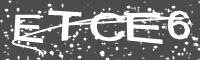

In [5]:
# Solution for non-static captcha url
# The image you're trying to download doesn't have a static url.
# (http://bsr.twse.com.tw/bshtm/CaptchaImage.aspx?guid=a7f3e499-893a-4ff3-9618-1ae4e39020fb)
# This means you can't use a static url for referencing the image
# (res = rs.get('http://bsr.twse.com.tw/bshtm/CaptchaImage.aspx?guid=a7f3e499-893a-4ff3-9618-1ae4e39020fb') won't work).

# Here's my solution using Requests and BeautifulSoup: (source: https://stackoverflow.com/questions/41754219/download-a-captcha-image-without-an-extension)
# see HowtoGetdynamicCAPTCHAUrl01.png, HowtoGetdynamicCAPTCHAUrl02.png, HowtoGetdynamicCAPTCHAUrl03.png

import requests
from mimetypes import guess_extension
from bs4 import BeautifulSoup

#from urllib.parse import urljoin
'''
ImportError                               Traceback (most recent call last)
<ipython-input-16-0ce9287f3757> in <module>()
     10 from bs4 import BeautifulSoup
     11 
---> 12 from urllib.parse import urljoin
     13 
     14 

ImportError: No module named parse
'''
# If you need to write code which is Python2 and Python3 compatible you can use the following import
try:
    from urllib.parse import urljoin
except ImportError:
     from urlparse import urljoin

http_proxy  = "http://proxy.xxx.com:8080/"
https_proxy = "http://proxy.xxx.com:8080/"
proxyDict = { 
    "http":http_proxy, 
    "https":https_proxy              
}

s = requests.session()
r = s.get('http://bsr.twse.com.tw/bshtm/', stream=True, verify=False, proxies=proxyDict)
#print(r.content)
'''
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
    <title>TAIWAN STOCK EXCHANGE.買賣日報表查詢系統</title>

    <style type="text/css">
        body {
            margin: 0;
            padding: 0;
            border: 0;
            overflow: hidden;
            height: 100%;
            max-height: 100%;
        }
    </style>
</head>
<frameset cols="300,*" border="0">
   <frame id="page1" name="page1" src="bsMenu.aspx">
   <frame id="page2" name="page2" src="bsWelcome.aspx">
</frameset>
</html>
'''

r = s.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', stream=True, verify=False, proxies=proxyDict)
#print(r.content) # this is what we want

captchaImageName = ''
if r.status_code == 200:            
    soup = BeautifulSoup(r.content, "html.parser")
    #div = soup.find("div", attrs={"class": "captcha", "style": "color:Red;width:100%;"})
    div = soup.find("div", attrs={"style": "text-align:center;margin:5px;"})
    
    print(div)
    '''
    <div style="text-align:center;margin:5px;">
        <img border="0" height="60" src="CaptchaImage.aspx?guid=0d1a504b-aeef-4b62-982f-f6b0bdcd0df3" width="200"/>
    </div>
    '''
        
    r = s.get(urljoin("http://bsr.twse.com.tw/bshtm/", div.img["src"]), stream=True, verify=False, proxies=proxyDict)
    if r.status_code == 200:
        guess = guess_extension(r.headers['content-type'])
        if guess:
            #with open("DynamicCaptcha" + guess, "wb") as f:
            with open("DynamicCaptcha" + ".jpg", "wb") as f:
                f.write(r.content)
                #captchaImageName = "DynamicCaptcha" + guess
                captchaImageName = "DynamicCaptcha" + ".jpg"
            # Image.open(BytesIO(r.content)).show()

import IPython.display
IPython.display.Image(captchaImageName)

In [6]:
import requests
payload = {
    '__VIEWSTATE': '/wEPDwUJOTAxMjkxMjg3D2QWAgIDD2QWBAIBD2QWAmYPZBYEZg9kFgJmDxAPFgYeB0NoZWNrZWRnHglGb3JlQ29sb3IKAB4EXyFTQgIEZGRkZAIBD2QWAgIBDw8WBB8BCgAfAgIEZGQCAw9kFgQCAw8PFgIeBFRleHRlZGQCCQ8PFgYeC05hdmlnYXRlVXJsBRB+L2JzQ29udGVudC5hc3B4HwMFD+S4i+i8iSA1NDM0IENTVh4HVmlzaWJsZWdkZBgCBR5fX0NvbnRyb2xzUmVxdWlyZVBvc3RCYWNrS2V5X18WAwUSUmFkaW9CdXR0b25fTm9ybWFsBRBSYWRpb0J1dHRvbl9FeGNkBRBSYWRpb0J1dHRvbl9FeGNkBQ9DYXB0Y2hhQ29udHJvbDEPBSQzYzJkYzZiNi05ODgyLTRjZmMtODk1Ni0wYzkyNTc3NzQ0YWRkDKBfdKUf9NPnTbbxijlfbg==',
    '__VIEWSTATEGENERATOR': 'AA1F01CB',
    '__EVENTVALIDATION': '/wEdAAY+1/fUT0D4eDDq8wPhy/n7fMmuxAJNAJcNkRRsVeJwwqKURZav/+YrVMqaWE2hvMxJwK4Ohf3nRgXHkFhQen1PRSciNdPYWmINCrip1wqw01PJCA0uL9aE2sjICZqv6GpbLa5fJ7IK5PNDHfzLIezF',
    'RadioButton_Normal': 'RadioButton_Normal',
    'TextBox_Stkno': '2493',
    'CaptchaControl1': 'ETCE6',
    'btnOK': '查詢',
}

resMenu = s.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data=payload, stream=True, verify=False, proxies=proxyDict)
#print(resMenu.text)
resContent = s.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx?v=t', stream=True, verify=False, proxies=proxyDict)
print(resContent.text)